In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.style.use("fivethirtyeight")

Create some random sinusoidal data.

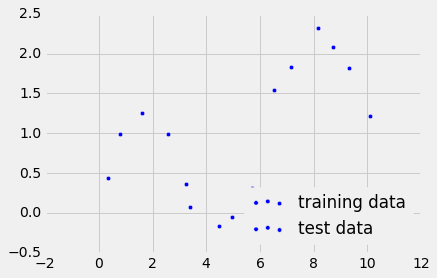

In [2]:
np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)


plt.figure()
plt.scatter(X_train, y_train, label='training data');
plt.scatter(X_test, y_test, label='test data');
plt.legend(loc=4);

In [4]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics.regression import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

In [5]:
def plot_one(degree_predictions):
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

Fit polynomial regression models with degree 1, 3, 6, and 9 on the training data.

In [28]:
x = x.reshape(-1, 1)
Xnew = np.linspace(0, 10, 100).reshape(-1 ,1)
degrees = [1, 3, 6, 9]
preds = np.zeros((4, 100))
for i in range(len(degrees)):
    poly = PolynomialFeatures(degrees[i])
    polyX = poly.fit_transform(x)
    xtrain, xtest, ytrain, ytest = train_test_split(polyX, y, random_state = 0)
    linreg = LinearRegression().fit(xtrain, ytrain)
    predDeg = linreg.predict(poly.fit_transform(Xnew))
    preds[i, :] = predDeg 

Plot predictions on training set from regressions.

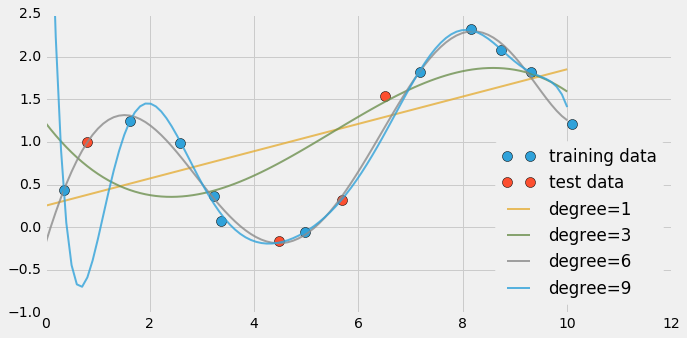

In [30]:
plot_one(preds)

In [31]:
degrees = np.arange(10)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
for i in range(len(degrees)):
    poly = PolynomialFeatures(degrees[i])
    polyX = poly.fit_transform(x)
    xtrain, xtest, ytrain, ytest = train_test_split(polyX, y, random_state = 0)
    linreg = LinearRegression().fit(xtrain, ytrain)
    predTrain = linreg.predict(xtrain)
    predTest = linreg.predict(xtest)
    print "Degree:", degrees[i]
    print "Training score:", r2_score(ytrain, predTrain)
    print "Test score:", r2_score(ytest, predTest)

Degree: 0
Training score: 0.0
Test score: -0.478086417371
Degree: 1
Training score: 0.429245778123
Test score: -0.452371042339
Degree: 2
Training score: 0.451099804441
Test score: -0.0685698414992
Degree: 3
Training score: 0.587199536878
Test score: 0.00533105294573
Degree: 4
Training score: 0.919419447177
Test score: 0.730049428187
Degree: 5
Training score: 0.975786414307
Test score: 0.87708300916
Degree: 6
Training score: 0.99018233248
Test score: 0.921409398145
Degree: 7
Training score: 0.993525092784
Test score: 0.920215041217
Degree: 8
Training score: 0.996375453878
Test score: 0.632479407269
Degree: 9
Training score: 0.998037062566
Test score: -0.645253531098


In [36]:
poly = PolynomialFeatures(12)
polyX = poly.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(polyX, y, random_state = 0)
linreg = LinearRegression().fit(xtrain, ytrain)
linregTrain = linreg.predict(xtrain)
linregTest = linreg.predict(xtest)
print "Training score linear regression:", r2_score(ytrain, linregTrain)
print "Test score linear regression:", r2_score(ytest, linregTest)
lasso = Lasso(alpha=0.01, max_iter=10000).fit(xtrain, ytrain)
lassoTrain = lasso.predict(xtrain)
lassoTest = lasso.predict(xtest)
print "Training score lasso:", r2_score(ytrain, lassoTrain)
print "Test score lasso:", r2_score(ytest, lassoTest)

Training score linear regression: 0.999999999998
Test score linear regression: -4.31199280418
Training score lasso: 0.946919137126
Test score lasso: 0.840662561475


In [37]:
mush = pd.read_csv("mushrooms.csv")
mush = pd.get_dummies(mush)
X = mush.iloc[:, 2:]
y = mush.iloc[:, 1]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [39]:
dtree = DecisionTreeClassifier(random_state=0).fit(xtrain, ytrain)

In [54]:
X.columns[np.argsort(-dtree.feature_importances_)][:5]

Index([u'odor_n', u'stalk-root_c', u'stalk-root_r', u'spore-print-color_r',
       u'odor_l'],
      dtype='object')

In [59]:
gammas = np.logspace(-4, 1, 6)
train_scores, valid_scores = validation_curve(SVC(kernel="rbf", C=1), xtrain, ytrain, "gamma", gammas)

In [60]:
train_scores

array([[ 0.89192516,  0.88601674,  0.89414082],
       [ 0.97685869,  0.96676514,  0.97464303],
       [ 0.99827671,  0.9985229 ,  0.99581487],
       [ 1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ]])

In [61]:
valid_scores

array([[ 0.8882324 ,  0.89807976,  0.88330871],
       [ 0.96947317,  0.96553422,  0.97636632],
       [ 0.99655342,  0.99901526,  0.99310684],
       [ 1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ],
       [ 0.51649434,  0.51649434,  0.51649434]])

In [63]:
np.mean(train_scores, axis=1)

array([ 0.89069424,  0.97275562,  0.99753816,  1.        ,  1.        ,  1.        ])

In [64]:
np.mean(valid_scores, axis=1)

array([ 0.88987363,  0.9704579 ,  0.99622518,  1.        ,  1.        ,
        0.51649434])